In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [3]:
data=DataFrame(np.array([[-0.86,-0.30,-0.05,0.73],[5,5,5,5],[0,1,3,5]]),index=["Dose","Number of animals","Number of deaths"]).T
print data

   Dose  Number of animals  Number of deaths
0 -0.86                  5                 0
1 -0.30                  5                 1
2 -0.05                  5                 3
3  0.73                  5                 5


In [ ]:
def EP_bioassay():
    J=len(y)
    natural_param1=[]
    natural_param2=[]
    for j in range(J):
        natural_param1.append(0)
        natural_param2.append(np.identity(2))
    
    

In [4]:
np.identity(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [63]:
def invlogit(alpha,beta,x):
    invlogit=np.exp(alpha+beta*x)/(1+np.exp(alpha+beta*x))
    return invlogit
    
def posterior(alpha,beta,y,n,x):
    posterior_dens=[]
    for i in range(len(alpha)):
        grid=[]
        for j in range(len(beta)):
            A=1.0
            for k in range(len(x)):
                A=A*np.power(invlogit(alpha[i],beta[j],x[k]),y[k])*np.power(1-invlogit(alpha[i],beta[j],x[k]),n[k]-y[k])
            grid.append(A)
        posterior_dens.append(grid)
    return posterior_dens
    
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T
    return summ

In [51]:
alphagrid=np.linspace(-4,10,400)
betagrid=np.linspace(-10,40,400)
contours_1=np.arange(0.05,1.0,0.05)
contours_1=contours_1.tolist()
contours=[0.0001,0.001,0.01]
contours.extend(contours_1)
dens=posterior(alphagrid,betagrid,np.array(data.ix[:,2]),np.array(data.ix[:,1]),np.array(data.ix[:,0]))

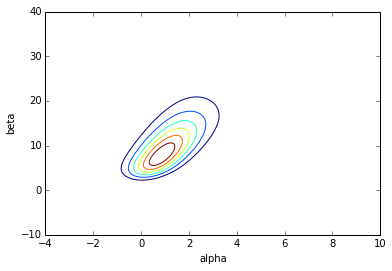

In [52]:
plt.contour(alphagrid,betagrid,DataFrame(dens).T)
plt.xlabel("alpha")
plt.ylabel("beta")

In [61]:
alpha_dens=DataFrame(dens).T
beta_dens=DataFrame(dens,index=alphagrid).T

alpha=np.random.choice(np.array(alphagrid),p=np.array(np.sum(alpha_dens))/np.sum(np.sum(alpha_dens)),size=400)
beta=[]
for i in range(len(alpha)):
    beta.append(np.random.choice(np.array(betagrid),p=np.array(beta_dens[alpha[i]])/np.sum(beta_dens[alpha[i]])))
    
alpha=alpha+np.random.uniform(-0.5,0.5,len(alpha))
beta=np.array(beta)+np.random.uniform(-0.5,0.5,len(beta))

(-10, 40)

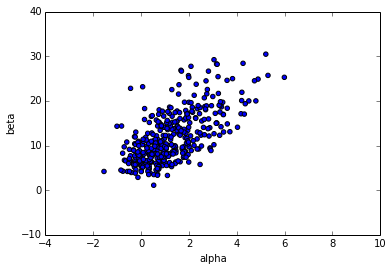

In [62]:
plt.scatter(alpha,beta)
plt.xlabel("alpha")
plt.ylabel("beta")
plt.xlim([-4,10])
plt.ylim([-10,40])

In [64]:
print summ(alpha)
print summ(beta)

          mean        sd      2.5%       25%       50%       75%     97.5%
info  1.253475  1.240726 -0.571886  0.373738  1.019316  1.948603  4.214118
           mean        sd      2.5%      25%        50%        75%     97.5%
info  11.775291  5.696047  4.156174  7.56684  10.341659  15.220272  25.66743
